<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/Renewable-Energy-Project/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Mahdi-Abdollahii/Renewable-Energy-Project.git

Cloning into 'Renewable-Energy-Project'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 97 (delta 36), reused 2 (delta 1), pack-reused 0
Unpacking objects: 100% (97/97), 706.21 KiB | 4.74 MiB/s, done.


In [2]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import csv
from scipy import stats

In [ ]:
df = pd.read_csv("/content/Renewable-Energy-Project/Data/World_1980_2021.csv", index_col= 'Unnamed: 0')
df = df.astype(float)

In [ ]:
Y_cons = np.array(df[df.index == 'Consumption (terajoules)'])
Y_Prod = np.array(df[df.index == 'Production (terajoules)'])
X_year = np.array(df.columns )

In [ ]:
X_year[::5]

array(['1980', '1985', '1990', '1995', '2000', '2005', '2010', '2015',
       '2020'], dtype=object)

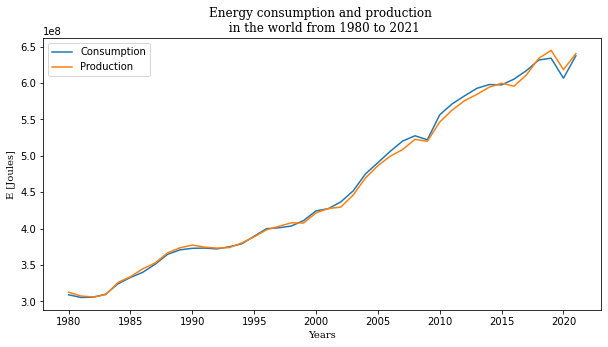

In [ ]:
fig,axe = plt.subplots(1,1,figsize = (10, 5))

axe.plot(X_year,Y_cons.reshape(-1),label= 'Consumption')
axe.plot(X_year,Y_Prod.reshape(-1),label= 'Production')
axe.set_title("Energy consumption and production \n in the world from 1980 to 2021" , fontname = 'serif')
axe.set_xlabel('Years', fontname = 'serif')
axe.set_ylabel('E [Joules]', fontname = 'serif')
axe.set_xticks(X_year[::5])
plt.legend()
plt.savefig('energy_consume_production.png',dpi=2000)

## Reg

In [5]:
df = pd.read_csv("/content/Renewable-Energy-Project/Data/Energy_consumption_(OWD).csv")

In [6]:
df

,Entity,Code,Year,Geo Biomass Other - TWh (zero filled),Biofuels Consumption - TWh - Total (zero filled),Solar Consumption - TWh (zero filled),Wind Consumption - TWh (zero filled),Hydro Consumption - TWh (zero filled),Nuclear Consumption - TWh (zero filled),Gas Consumption - TWh (zero filled),Coal Consumption - TWh (zero filled),Oil Consumption - TWh (zero filled)
0,Africa,NaN,1965,0.00000,0.0000,0.0000,0.0000,41.118813,0.0000,9.543755,323.49612,341.26276
1,Africa,NaN,1966,0.00000,0.0000,0.0000,0.0000,45.862915,0.0000,10.669916,323.12220,369.48657
2,Africa,NaN,1967,0.00000,0.0000,0.0000,0.0000,47.875538,0.0000,10.545670,330.29156,368.12524
3,Africa,NaN,1968,0.00000,0.0000,0.0000,0.0000,56.000473,0.0000,10.688970,343.51290,389.19986
4,Africa,NaN,1969,0.00000,0.0000,0.0000,0.0000,65.352100,0.0000,12.492000,346.64294,396.92285
...,...,...,...,...,...,...,...,...,...,...,...,...
5977,World,OWID_WRL,2017,596.42050,972.5343,1185.5151,3034.9170,10831.405000,6734.8735,36529.223000,43751.67600,52515.54300
5978,World,OWID_WRL,2018,643.03204,1045.9080,1524.5498,3360.0188,11067.518000,6856.0166,38356.300000,44315.87500,53250.62000
5979,World,OWID_WRL,2019,674.74536,1120.1494,1855.5922,3744.5151,11153.792000,7073.2896,39062.945000,43699.88700,53368.63000
5980,World,OWID_WRL,2020,703.91644,1065.5650,2222.4430,4192.6820,11413.828000,6789.3020,38455.727000,41963.96500,48380.71000


In [27]:
X_year = np.array(df[df['Code'] == 'OWID_WRL']['Year'])

In [26]:
Y_cons = np.array(df[df['Code'] == 'OWID_WRL'].transpose().iloc[3:].sum())

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_year.reshape(-1, 1), Y_cons.reshape(-1, 1) , test_size=0.5)

In [32]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit( X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [33]:
from matplotlib.lines import MarkerStyle
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


Coefficients: 
 [[2094.97070338]]
Mean squared error: 13787091.80
Coefficient of determination: 0.99


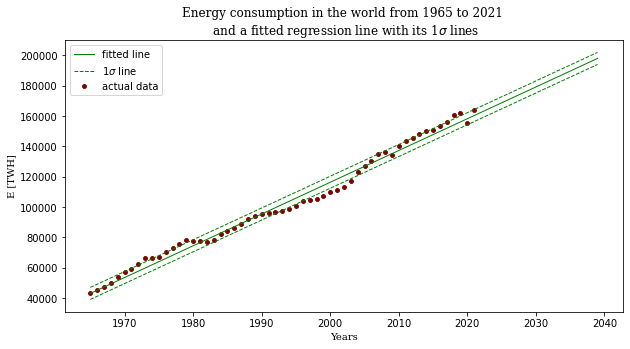

In [46]:
fig,axe = plt.subplots(1,1,figsize = (10, 5))
# Plot outputs
axe.scatter(X_train, y_train, color="maroon" , s = 15 , label= "actual data" )
axe.scatter(X_test, y_test, color="maroon" , s = 15 )

X_future = np.array([range(1965,2040,1)]).reshape(-1,1)
y_future = regr.predict(X_future)
sigma = np.sqrt(np.var(y_future[0:len(Y_cons.reshape(-1))].reshape(-1) - Y_cons.reshape(-1)))

axe.plot(X_future , y_future , color="green", linewidth=1 , label = "fitted line")
axe.plot(X_future , y_future - sigma , color="green", linewidth=1,  linestyle='dashed' , label = '1$\sigma$ line'  )
axe.plot(X_future , y_future + sigma , color="green", linewidth=1,  linestyle='dashed' )


axe.set_title("Energy consumption in the world from 1965 to 2021 \n and a fitted regression line with its 1$\sigma$ lines" , fontname = 'serif')
axe.set_xlabel('Years', fontname = 'serif')
axe.set_ylabel('E [TWH]', fontname = 'serif')
plt.legend()

plt.savefig('consume_Energy_LR.png',dpi=2000)